In [39]:
import tensorflow as tf

# Introduction

We will start with a digit recognition problem, where an image of a handwritten digit is provided and we are building a simple neural network at the start consisting of only input and output layers which we will increase eventually with a hidden layer of neurons to check performance.

There are 10 output neurons (0-9) and (n*n) input.

# Image to input

To bring an image to the format of a typical input for a neural network, we assign a value to every image pixel between 0 and 255 (Based on black to white).

Then we need to flatten the 2 dimensional array (nxn grid) into a 1 dimensional vector.

In starting, we will use 28x28 grid -> 784 neurons in input layer and 10 in output.

In [40]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train[0].shape

(28, 28)

In [41]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

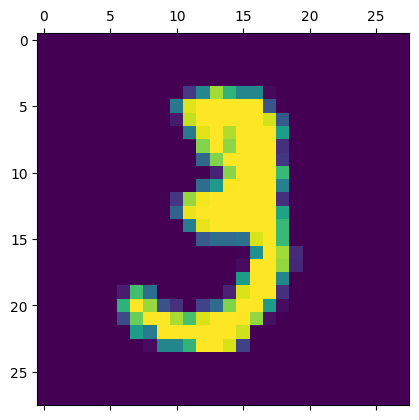

In [42]:
plt.matshow(X_train[10])

In [43]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [44]:
len(X_train)

60000

# Scaling the values of matrix from 0-255 to 0-1

In [45]:
X_train = X_train / 255
X_test = X_test / 255

print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Flatten of X_train and test

In [46]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)

print(X_train_flatten.shape)
print(X_test_flatten.shape)

(60000, 784)
(10000, 784)


In [47]:
X_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Sequential

-> means that there is a stack of neuron layers and we will be giving each layer as a separate element.

## Dense

-> means that every neuron in 1 layer is connected with each neuron of the next layer.

## Optimiser

-> They allow you to train efficiently, during backward propagation when training is going on, the optimisers will help you reach global optima efficiently. (More of this after)

## Loss functions

-> From documentation

In [49]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['Accuracy']
)

model.fit(X_train_flatten, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 320us/step - Accuracy: 0.8055 - loss: 0.7373
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 318us/step - Accuracy: 0.9133 - loss: 0.3114
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 319us/step - Accuracy: 0.9196 - loss: 0.2862
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 311us/step - Accuracy: 0.9230 - loss: 0.2708
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 316us/step - Accuracy: 0.9254 - loss: 0.2690


In [50]:
model.evaluate(X_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - Accuracy: 0.9134 - loss: 0.3028


[0.26750463247299194, 0.925000011920929]

## Prediction for a single element

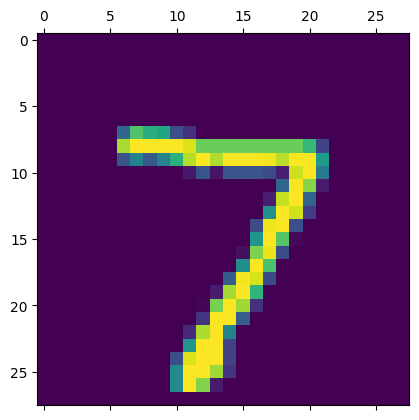

In [52]:
plt.matshow(X_test[0])

## Prediction fail

The prediction method shown below has a problem, it returns an array of probabilities for every single digit. I just want the integer with highest probability.

In [53]:
predicted = model.predict(X_test_flatten)    # model.predict does the predictions for every data value, not any specific one
predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step


array([2.8956007e-02, 3.7248341e-07, 7.4648798e-02, 9.6425891e-01,
       3.5912453e-03, 1.8456879e-01, 1.9843494e-06, 9.9986762e-01,
       1.5541492e-01, 7.2079927e-01], dtype=float32)

In [54]:
max_val = np.argmax(predicted[0])
print(max_val)

7


### Now we need to convert whole of predicted from array of probabilities to a single integer (class) format.

In [55]:
y_predicted_integer = [np.argmax(i) for i in predicted]
print(y_predicted_integer)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 2, 7, 4, 2, 4, 3, 0, 7, 0, 2, 7, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 3, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 7, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 5, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 6, 7, 1, 2, 4, 0, 2, 9, 4, 3, 3, 0, 0, 5, 1, 9, 6, 5, 2, 5, 7, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

## Confusion Matrix

To create a confusion matrix with tensor flow, we need to convert the predicted matrix to an array of class labels rather than probabilities.

In [61]:
conf_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_integer)
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    3,    1,    0,    7,    6,    4,    3,    0],
       [   0, 1106,    4,    2,    0,    2,    3,    2,   16,    0],
       [   3,    7,  931,   15,    7,    5,   10,   10,   40,    4],
       [   2,    0,   20,  903,    0,   37,    2,   14,   26,    6],
       [   1,    1,    5,    2,  916,    0,    9,    6,   11,   31],
       [   8,    2,    6,   20,    8,  795,    7,    8,   31,    7],
       [  11,    3,    9,    1,    8,   18,  902,    2,    4,    0],
       [   1,    5,   23,    5,    3,    0,    0,  966,    4,   21],
       [   4,    6,    7,   18,    9,   24,    8,   14,  879,    5],
       [   9,    7,    1,   10,   30,    7,    0,   39,   10,  896]],
      dtype=int32)>

### Converting to a more visually aided format.